In [1]:
import numpy as np
import pandas as pd
import os
from skimage import io 
import skimage
import scipy

import matplotlib.pyplot as plt
#import pil\low
from tqdm import tqdm

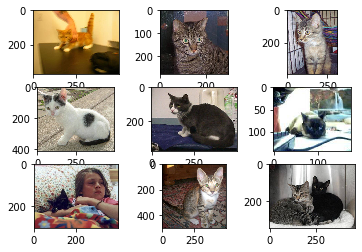

In [2]:
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [3]:
train_data = './' + 'train/'
test_data = './' + 'test1/' 
train_imgs = os.listdir(train_data)
test_imgs = os.listdir(test_data)
print(len(train_imgs), train_imgs[0])
print(len(test_imgs))

25000 cat.0.jpg
12500


In [5]:

photos, labels =list(), list()
num_px = 128

for file in os.listdir(folder):
    output = 0.0
    if file.startswith('cat'): #train_imgs[i].startswith('cat'):
        output=1.0
    image = io.imread(train_data + file) #train_imgs[i])
    image = skimage.transform.resize(image,(num_px,num_px,3));
#    image = image.reshape((num_px*num_px*3,1))
    photos.append(image)
    labels.append(output)
    
photos = np.asarray(photos)
labels = np.asarray(labels)
print(photos.shape,labels.shape)
save('dogs_vs_cats_photos.npy',photos)
save('dogs_vs_cats_labels.npy',labels)

(25000, 49152, 1) (25000,)


NameError: name 'save' is not defined

In [7]:
# save the reshaped photos
np.save('dogs_vs_cats_photos.npy', photos)
np.save('dogs_vs_cats_labels.npy', labels)

In [12]:
photos.shape, labels.shape

((25000, 49152, 1), (25000,))

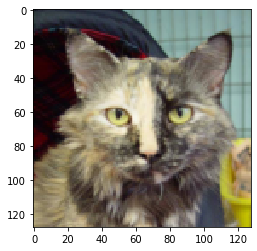

In [23]:
plt.imshow(photos[2,:].reshape(128,128,3))

In [27]:
X=photos.reshape(25000,128,128,3)

In [28]:
np.shape(X)

(25000, 128, 128, 3)

In [36]:

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD

# define cnn model
def define_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
 
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
 
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
              
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#    model.Dropout(0.5)
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [29]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(X,labels ,test_size = 0.1, random_state = 42)

In [37]:
np.shape(X),np.shape(X_test)

((22500, 128, 128, 3), (2500, 128, 128, 3))

In [38]:
model = define_model()
model.fit(X, Y, batch_size=10, epochs=25, validation_data=(X_test, Y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 22500 samples, validate on 2500 samples
Epoch 1/25
22500/22500 [==============================] - 529s 23ms/step - loss: 0.6354 - accuracy: 0.6303 - val_loss: 0.5788 - val_accuracy: 0.7104
Epoch 2/25
22500/22500 [==============================] - 534s 24ms/step - loss: 0.5242 - accuracy: 0.7391 - val_loss: 0.5094 - val_accuracy: 0.7524
Epoch 3/25
22500/22500 [==============================] - 534s 24ms/step - loss: 0.4609 - accuracy: 0.7806 - val_loss: 0.4553 - val_accuracy: 0.7908
Epoch 4/25
22500/22500 [==============================] - 530s 24ms/step - loss: 0.4184 - accuracy: 0.8063 - val_loss: 0.6036 - val_accuracy: 0.7012
Epoch 5/25
22500/22500 [==============================] - 527s 23ms/step - loss: 0.3779 - accuracy: 0.8319 - val_loss: 0.4069 - val_accuracy: 0.8136
Epoch 6/25
22500/22500 [==============================] - 524s 23ms/step - loss: 0.3383 - accuracy: 0.8503 - val_loss: 0.4054 - val_accuracy: 0.8176
Epoch 7/2